[Reference](https://towardsdev.com/step-by-step-to-draw-a-5-dimensional-scatter-plot-in-python-34a20c784eda)

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/checkming00/Medium_datasets/main/WH%20Report_preprocessed.csv')

<Axes: xlabel='Healthy_life_expectancy_at_birth', ylabel='Log_GDP_per_capita'>

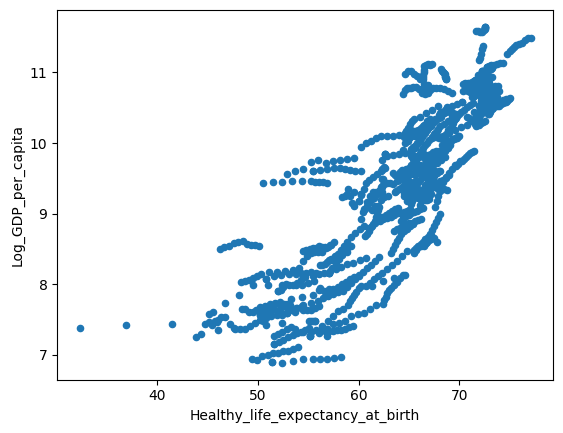

In [3]:
df.plot.scatter('Healthy_life_expectancy_at_birth', 'Log_GDP_per_capita')

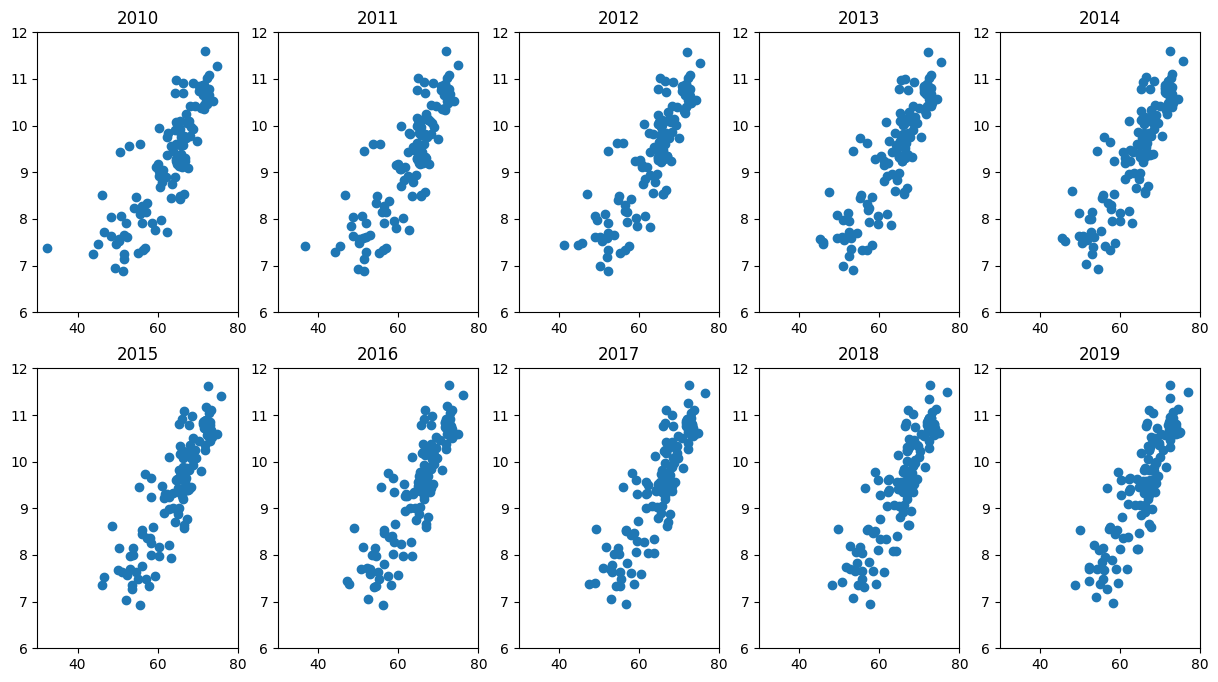

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 8))

years = np.sort(df.year.unique())
for i, year in enumerate(years):
    BM = df.year == year
    X = df[BM]['Healthy_life_expectancy_at_birth']
    Y = df[BM]['Log_GDP_per_capita']
    plt.subplot(2, 5, i+1) # 2X5 structure of subplots, at i+1 position
    plt.scatter(X, Y)
    plt.title(year)
    plt.xlim([30, 80]) # x axis range
    plt.ylim([6, 12]) # y axis range
plt.show()
plt.tight_layout()

In [5]:
def plotyear(year):
    BM = df.year == year
    X = df[BM]['Healthy_life_expectancy_at_birth']
    Y = df[BM]['Log_GDP_per_capita']
    plt.scatter(X, Y)
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30, 80])
    plt.ylim([6, 12])
    plt.show()

In [6]:
from ipywidgets import interact, widgets

min_year=df.year.min()
max_year=df.year.max()
interact(plotyear, 
         year=widgets.IntSlider(min=min_year, 
                                max=max_year, step=1, value=min_year))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In [7]:
continents = df.Continent.unique()

con_colors = dict(zip(continents, ['b', 'g', 'r', 'c', 'm', 'y' ,'k']))

In [8]:
import seaborn as sns

def plotyear_continent(year):
    BM = df.year == year
    sns.scatterplot(data=df[BM], x='Healthy_life_expectancy_at_birth', 
                    y='Log_GDP_per_capita', hue='Continent', palette=con_colors)
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30, 80])
    plt.ylim([6, 12])
    plt.legend()
    plt.show()

In [9]:
interact(plotyear_continent, 
         year=widgets.IntSlider(min=min_year, 
                                max=max_year, step=1, 
                                value=round(df.year.mean(),0)))

interactive(children=(IntSlider(value=2014, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear_continent(year)>

In [10]:
continents = df.Continent.unique()

con_colors = dict(zip(continents, ['b', 'g', 'r', 'c', 'm', 'y' ,'k']))

min_size=df['population'].min()/1000000  # Scale bubble minimum size
max_size=df['population'].max()/1000000  # Scale bubble maximum size

def plotyear_continent_pop(year):
    BM = df.year == year
    sns.scatterplot(data=df[BM], x='Healthy_life_expectancy_at_birth', 
                    y='Log_GDP_per_capita', hue='Continent', 
                    palette=con_colors, size='population', 
                    sizes=(min_size, max_size))
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30, 80])
    plt.ylim([6, 12])
    plt.legend()
    plt.show()

In [11]:
interact(plotyear_continent_pop, 
         year=widgets.IntSlider(min=min_year, 
                                max=max_year, step=1, 
                                value=round(df.year.mean(),0)))

interactive(children=(IntSlider(value=2014, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear_continent_pop(year)>